<H1> Distance Analysis </H1>
<P> Analysis of the connection probability versus intersomatic distance for synaptic connections between excitatory neurons (granule cells) and interneurons (PV-positive cells). It is based on simulatenous patch-clamp recordings in the dentate gyrus of the hyppocampus.

1. Read distances from dist files
2. Create a dictionary containing the keys:
	Data= distances
	type= type of connection, 
	syn: connectivity versus no connection.
3. Create histograms: 
	Total number of measured distances
	Total number of conncetions found
	Connection probability versus distance.

In [1]:
%pylab inline # numpy and matplotlib

Populating the interactive namespace from numpy and matplotlib


In [2]:

import matplotlib.mlab as mlab

import pickle
from scipy import stats
import csv
from scipy.optimize import curve_fit
from numpy.polynomial import polynomial as P

In [3]:
import glob  # Adding all the distance file in a list
myfilelist = glob.glob("*.dist") # save only the name of the file

<H2>1. Read distances from *dist files</H2>
<P>  
dist files contain three types of elements, 
<ul>
<li>1) intersomatic distances (float), 
<li>2) the connection types: inhibitory to inhibitory (II), inhibitory to excitatory (IE), excitatory to inhibitory (EI) and excitatory to excitatory (EE)
<li>3) synaptic connection: 1 for chemical, 2 for electrical, 0 no present.
</ul>

</P>
<P>
We need to create dictionaries of distances tested and distanced found for every connection type.
</P>

In [5]:
def update_dist2(mypath = '*.dist'):
    """
    Reads * dist files from a directory and obtains distances tested and distance
    found for every type of connection (e.g. )
  
    Argument
    ---------
    
    mypath: string
            the path containing all *dist files
            
    Returns: A dictionary with 
    'data' = distances measured (float)
    'type' = 'EE': excitatory to excitatory, 'EI':  excitatory to inhibitory, 
    'II': inhibitory to inhibitory, 'IE': inhibitory to excitatory (string)
    'syn'  = 1 if connected, 0 otherwise (integer)
    'file_name' = string with trhe file name
    the dictionary is saved automatically
    This function is necessary for updating the dictionary with new measurments
    """
    
    distances = []
    list2 = []
    list3 = []
    list4 = []
            
    myfilelist = glob.glob(mypath)
            
    for fp in myfilelist:
        with open(fp) as f:
            for line in csv.reader(f, delimiter= "\t"):
                list1.append(str(fp)) 
                list2.append(abs(float(line[0])))
                list3.append(str(line[2]))
                list4.append(int(line[4]))

    mydict2 = 
    mydict2['fname'] = list1
    mydict2['data'] = list2
    mydict2['type'] = list3
    mydict2['syn'] = list4
    
    pickle.dump(mydict2, open( "mydict2.p", "wb")) # for creating and saving a dictionary. 
    return mydict2

In [6]:
def plotstyle():
    plt.yticks([0, 10, 20, 30, 40], fontsize = 20);
    plt.xticks([ 0, 50, 100, 150, 200, 250, 300, 350], fontsize = 20);
    #plt.ylim(ymin = -0.05, ymax=1.05)
    plt.xlim(-25, 355)
    plt.xlabel('intersomatic distance ($\mu$m)', fontsize = 20)

In [7]:
def plotstyle2():
    plt.yticks([0, 20, 40, 60, 80, 100], fontsize = 20);
    plt.xticks([ 0, 50, 100, 150, 200, 250, 300, 350], fontsize = 20);
    plt.ylim(ymin = -10, ymax=110)
    plt.xlim(-25, 355)
    plt.xlabel('intersomatic distance ($\mu$m)', fontsize = 20)

In [8]:
def errorb(p,n):
    """
    return the confidence interval (CI) for a binomial distribution with a normal approximation
    the for of the formula is
    p +- (z1- alfa/2) * np.sqrt((p*(1-p))/n)
    p +- 1.96 * np.sqrt((p*(1-p))/n)

    p = probability (proportion of interest 
    n = sample size
    alfa = desire confidence
    z1 - alfa/2 = ' z value' for desire level of cinfidence
    z1 - alfa/2 = 1.96 for 95% confidence
    z1 - alfa/2 = 2.57 for 99% confidence
    z1 - alfa/2 = 3 for 99.73% confidence
   
    """
    return 1.96 * np.sqrt((p*(1-p))/n)

In [9]:
#1.1 create a list with sublist of all distances data.
mynewdict = pickle.load(open("mydict2.p", "rb"))
mydata = zip(mynewdict['data'], mynewdict['type'], mynewdict['syn'], mynewdict['fname'])

In [10]:
# for Fitting the data
def sigmoid2(x, A, B, C, r):
    """
    solves for the following sigmoid function:
    f(x; A, B, C, r )= B + ( A  / ( 1 + np.exp((x-C)/r)))
    
    where x is the independent variable
    B is the offset
    A is the maximal amplitude of the curve
    C is the half point of the sigmoidal function
    r is rate of maximum population growth 
    """
    return B + ( A  / ( 1 + np.exp((x-C)/r)))
    

In [11]:
# for Fitting the data
def sigmoid(x, A, C, r):
    """
    solves for the following 1igmoid function:
    f(x; A, C, r )=( A  / ( 1 + np.exp((x-C)/r)))
    
    where x is the independent variable
    A is the maximal amplitude of the curve
    C is the half point of the sigmoidal function
    r is rate of maximum population growth 
    """
    return  A  / ( 1 + np.exp((x-C)/r))

<H3> 1. EI and IE connections, Histograms </H3>

In [12]:
#1.2 Create a 2 numpy array of distances, first with all 'IE' connections, second with all 'IE' connections
total_dist = np.array(mynewdict['data'], dtype=np.float),
hist, bin_edges = np.histogram(total_dist, bins = [0,50,100,150,200,250,300,350])

total_IE = []
for index, value in enumerate(mynewdict['type']):
    if value == 'IE':
        total_IE.append(mynewdict['data'][index])

IE_t = np.array(total_IE, dtype=np.float),
hist_IEt, bin_edges_IEt = np.histogram(IE_t, bins = [0,50,100,150,200,250,300,350])
print 'total IE connections tested: ', hist_IEt


total_EI = []
for index, value in enumerate(mynewdict['type']):
    if value == 'EI':
        total_EI.append(mynewdict['data'][index])

EI_t = np.array(total_EI, dtype=np.float),
hist_EIt, bin_edges_EIt = np.histogram(EI_t, bins = [0,50,100,150,200,250,300,350])
print 'total EI connections tested: ', hist_EIt

total IE connections tested:  [170 444 222 125  41  28   8]
total EI connections tested:  [170 444 223 125  41  28   8]


In [13]:
total_EE = []
for index, value in enumerate(mynewdict['type']):
    if value == 'EE':
        total_EE.append(mynewdict['data'][index])

EI_t = np.array(total_EE, dtype=np.float),
hist_EEt, bin_edges_EEt = np.histogram(EI_t, bins = [0,50,100,150,200,250,300,350])
print 'total EI connections tested: ', hist_EEt

print 'total IE connections tested: ',sum(hist_EEt)

total EI connections tested:  [ 714 1178  886  596  390  178   86]
total IE connections tested:  4028


In [14]:
total_testedIE =sum(hist_IEt)
total_testedEI = sum (hist_EIt)
print 'total IE connections tested: ', total_testedIE
print 'total EI connections tested: ', total_testedEI

total IE connections tested:  1038
total EI connections tested:  1039


In [15]:
170+444+222+125+41+28+8

1038

In [16]:
# 1.3 Create a list and a numpy array only with the distances of IE connections found
IE_dist = []
for i, j, k, n in mydata:
    if j == 'IE' and k ==1:
        IE_dist.append(i)

IE_array = np.array(IE_dist, dtype=np.float),
hist1, bin_edges1 = np.histogram(IE_array, bins = [0,50,100,150,200,250,300,350])
print 'total number IE found : ', hist1


#1.4 Crate a list and a numpy array only with the distances of EI connections found
EI_dist =[]
for i, j, k, n in mydata:
    if j == 'EI' and k ==1:
        EI_dist.append(i)

EI_array = np.array(EI_dist, dtype=np.float),
hist2, bin_edges2 = np.histogram(EI_array, bins = [0,50,100,150,200,250,300,350])
print 'total number EI found: ', hist2

total number IE found :  [ 46 130  52  27   7   2   0]
total number EI found:  [20 49 17  3  0  0  0]


In [17]:
total_foundIE =sum(hist1)
total_foundEI = sum (hist2)
print 'total IE connections found: ', total_foundIE
print 'total EI connections found: ', total_foundEI

total IE connections found:  264
total EI connections found:  89


In [18]:
#1.5  create a np.array with the information of the porbailities of connection for all type of distances found.
IE_pr= np.array(hist1,dtype=np.float) / np.array(hist_IEt,dtype=np.float) 
EI_pr = np.array(hist2,dtype=np.float) / np.array(hist_EIt,dtype=np.float)

print 'Probability of IE connection= '
print np.round(IE_pr,3)
print 'Probability of EI connection: '  
print np.round(EI_pr,3)


Probability of IE connection= 
[ 0.271  0.293  0.234  0.216  0.171  0.071  0.   ]
Probability of EI connection: 
[ 0.118  0.11   0.076  0.024  0.     0.     0.   ]


In [19]:
#1.6 Coinfidence interval for binomial distribution for EI and IE connection
errorIE = map(errorb, IE_pr, hist_IEt) 
errorEI = map(errorb, EI_pr, hist_EIt) 
   
print 'CI IE: ', np.round(errorIE,3)
print 'CI EI: ' , np.round(errorEI,3)

CI IE:  [ 0.067  0.042  0.056  0.072  0.115  0.095  0.   ]
CI EI:  [ 0.048  0.029  0.035  0.027  0.     0.     0.   ]


In [20]:
#1.7 Transform error and probability in percentage
errorIE_p = np.array(errorIE, dtype = float) *100
errorEI_p = np.array(errorEI, dtype = float) *100
IE_pr_p = IE_pr * 100 # change to percentage 
EI_pr_p = EI_pr * 100

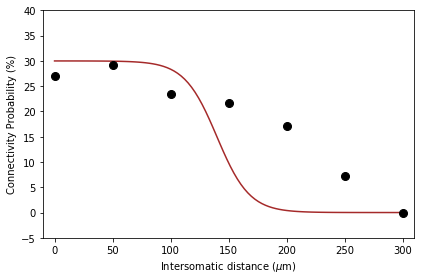

In [22]:
# plot a suggestion for fitting connection probablity data IE
xdata, ydata = [0,50,100,150,200,250,300], IE_pr_p
x = np.linspace(0, 300, 100)
y = sigmoid3(x, A = 30, C = 140, r =14)
plt.plot(x,y, color='brown');

plt.plot(xdata, ydata, 'ko', markersize=8);
plt.ylim(-5,40), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity Probability (%)');

In [23]:
# perform best fit
# fit to the function
pinit = [40, 140, 14]
popt, pcov = curve_fit(sigmoid3, xdata, ydata, p0 = pinit)
 
print (popt,3)

[  27.034  211.399   36.26 ]


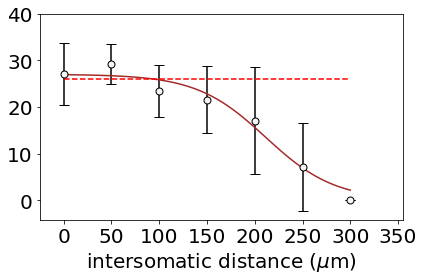

In [24]:
# Plot fitting results together with data
xfit = np.linspace(0, 300, 100)
yfit = sigmoid3(x, A = popt[0], C = popt[1], r=popt[2])

plt.plot(xdata, ydata, 'ko', xfit, yfit,color = 'brown')
plt.plot([0,50,100,150,200,250,300],[0.26*100]*7, '--', color = 'red')
plt.errorbar([0,50,100,150,200,250,300], IE_pr_p, yerr = errorIE_p, fmt='o', color = '#f5f5f5' , markersize=7, mew=1, ecolor= 'black', capsize = 5, markeredgecolor='black')
plotstyle()

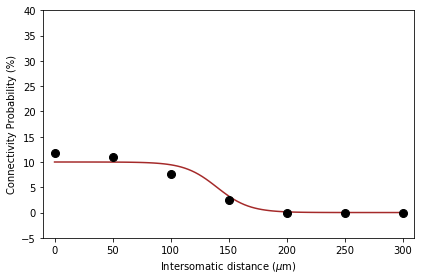

In [25]:
# plot a suggestion for fitting connection probablity data EI
xdata_EI, ydata_EI = [0,50,100,150,200,250,300], EI_pr_p
x_EI = np.linspace(0, 300, 100)
y_EI = sigmoid3(x, A = 10, C = 140, r =14)
plt.plot(x_EI,y_EI, color='brown');

plt.plot(xdata_EI, ydata_EI, 'ko', markersize=8);
plt.ylim(-5,40), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity Probability (%)');

In [26]:
# perform best fit
# fit to the function
pinit_EI = [10, 140, 14]
popt2, pcov2 = curve_fit(sigmoid3, xdata_EI, ydata_EI, p0 = pinit_EI)
 
print(popt2)

[  11.83985871  114.82018211   24.45287256]


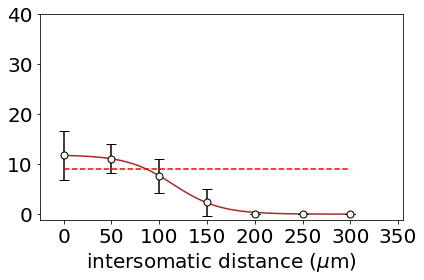

In [27]:
# Plot fitting results together with data
xfit_EI = np.linspace(0, 300, 100)
yfit_EI = sigmoid3(x, A = popt2[0] , C = popt2[1], r=popt2[2])

plt.plot(xdata_EI, ydata_EI, 'ko', xfit_EI, yfit_EI,color = 'brown')
plt.plot([0,50,100,150,200,250,300],[0.09*100]*7, '--', color = 'red')
plt.errorbar([0,50,100,150,200,250,300], EI_pr_p, yerr = errorEI_p, fmt='o', color = '#f5f5f5' , markersize=7, mew=1, ecolor= 'black', capsize = 5, markeredgecolor='black')
plotstyle()

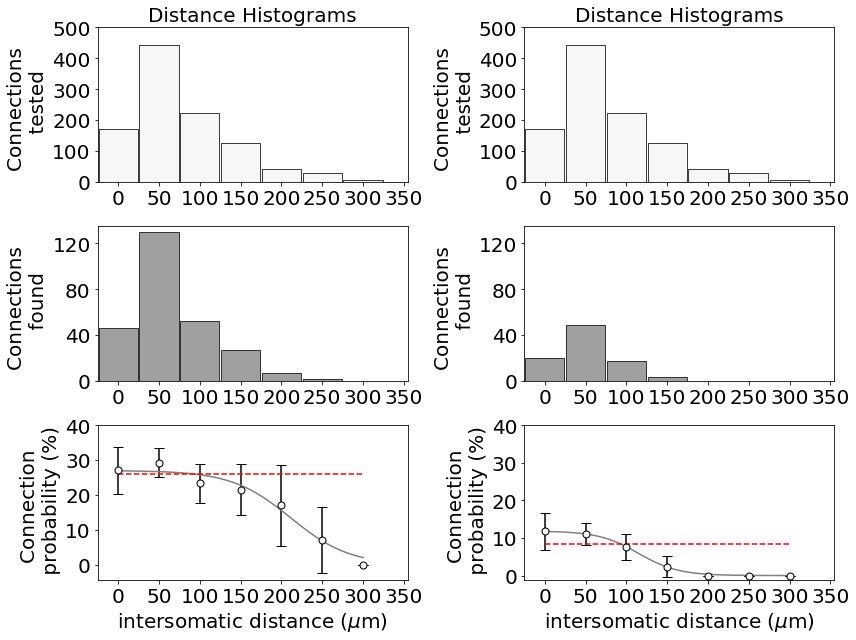

In [28]:
# 1.8 Plotting histograms 
"""
Create 3 types of plot according of two types of connections: 
    IE = from excitatory to inhibitory connections
    EI = from inhibitory to excitatory connections
    The plot are:
        histogram with the total number of connection found
        Histpgram with the number of connection found in the experiment
        plot with the probability of connectoion versus distance. 
        Coinfidence interval are calculated using binomial binomila function    
"""
    
fig = plt.figure(figsize=(12,9))
plt.subplot(321)
plt.title('Distance Histograms', fontsize = 20)
plt.ylabel("Connections \n tested", fontsize = 20) 
plt.bar(bin_edges[:-1], hist_IEt, width = 48, facecolor='#f5f5f5', edgecolor='black', alpha=0.75)
plt.xlim(-25, max(bin_edges) +5)
plt.ylim(0, max(hist_IEt)+20)
plt.yticks([0, 100, 200, 300, 400, 500], fontsize = 20);
plt.xticks([ 0, 50, 100, 150, 200, 250, 300, 350], fontsize = 20);

plt.subplot(322)
plt.title('Distance Histograms', fontsize = 20)
plt.ylabel("Connections \n tested", fontsize = 20) 
plt.bar(bin_edges[:-1], hist_EIt, width = 48, facecolor='#f5f5f5', edgecolor='black', alpha=0.75)
plt.xlim(-25, max(bin_edges) + 5)
plt.ylim(0, max(hist_IEt)+20)
plt.yticks([0, 100, 200, 300, 400, 500], fontsize = 20);
plt.xticks([ 0, 50, 100, 150, 200, 250, 300, 350], fontsize = 20);

plt.subplot(323)
plt.ylabel("Connections \n found", fontsize = 20) 
plt.bar(bin_edges1[:-1], hist1, width = 48, facecolor='grey', edgecolor='black', alpha=0.75)
plt.xlim(-25, max(bin_edges2) + 5)
plt.ylim(ymin = 0, ymax=38)
plt.ylim(0, max(hist1)+ 5)
plt.yticks([0, 40, 80, 120,], fontsize = 20);
plt.xticks([ 0, 50, 100, 150, 200, 250, 300, 350], fontsize = 20);

plt.subplot(324)
plt.ylabel("Connections \n found", fontsize = 20) 
plt.bar(bin_edges2[:-1], hist2, width = 48, facecolor='grey', edgecolor='black', alpha=0.75)
plt.xlim(-25, max(bin_edges2) + 5)
plt.ylim(ymin = 0, ymax=38)
plt.ylim(0, max(hist1)+ 5)
plt.yticks([0, 40, 80, 120], fontsize = 20);
plt.xticks([ 0, 50, 100, 150, 200, 250, 300, 350], fontsize = 20);

plt.subplot(325)
plt.ylabel("Connection \n probability (%)", fontsize = 20)    
plt.plot(xdata, ydata, 'ko', xfit, yfit,color = 'grey')
plt.plot([0,50,100,150,200,250,300],[0.26*100]*7, '--', color = 'red')
plt.errorbar([0,50,100,150,200,250,300], IE_pr_p, yerr = errorIE_p, fmt='o', color = '#f5f5f5' , markersize=7, mew=1, ecolor= 'black', capsize = 5, markeredgecolor='black')
plotstyle()

plt.subplot(326)
plt.ylabel("Connection \n probability (%)", fontsize = 20)
plt.plot(xdata_EI, ydata_EI, 'ko', xfit_EI, yfit_EI,color = 'grey')
plt.plot([0,50,100,150,200,250,300],[0.085*100]*7, '--', color = 'red')
plt.errorbar([0,50,100,150,200,250,300], EI_pr_p, yerr = errorEI_p, fmt='o', color = '#f5f5f5', markersize=7, ecolor= 'black', capsize = 5, markeredgecolor='black') 
plotstyle()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
savefig('dist_prob.pdf')  
plt.show()  

<H3> II connections, chemical and gap junctions, histograms </H3>

In [29]:
#2.1 Create a list and a numpy array only with the distances of II connections tested
total_II = []
for index, value in enumerate(mynewdict['type']):
    if value == 'II':
        total_II.append(mynewdict['data'][index])

II_t = np.array(total_II, dtype=np.float),
hist_IIt, bin_edges_IIt = np.histogram(II_t, bins = [0,50,100,150,200,250,300,350])
print 'total IIc connections: ', hist_IIt

# 2.2 Create a numpy array with gap connections tested 	
II_tg = np.unique(II_t[0])
hist_IItg, bin_edges_IItg = np.histogram(II_tg, bins = [0,50,100,150,200,250,300,350])
print 'total IIe connections tested: ', hist_IItg


total IIc connections:  [10 28 25 12  4  2  4]
total IIe connections tested:  [ 5 14 13  6  2  1  2]


In [30]:
total_testedIIC =sum(hist_IIt)
total_testedIIE = sum (hist_IItg)
print 'total IIC connections tested: ', total_testedIIC
print 'total IIE connections tested: ', total_testedIIE

total IIC connections tested:  85
total IIE connections tested:  43


In [31]:
##### 2.3 Create a list and a numpy array only with distances of II chemical connections found
IIc_dist = []
for i, j, k, n in mydata:
    if j == 'II' and k == 1 or k ==3:
        IIc_dist.append(i)

IIc_array = np.array(IIc_dist, dtype=np.float),
hist1, bin_edges1 = np.histogram(IIc_array, bins = [0,50,100,150,200,250,300,350])
print 'total number II chemical found : ', hist1

total number II chemical found :  [ 4 13  6  2  2  0  0]


In [32]:
# 2.4. Create a list and a numpy array only with distances of II gap junction connections found
IIg_dist = []
for i, j, k, n in mydata:
    if j == 'II' and k == 2 or k ==3:
        IIg_dist.append(i)

IIg_array = np.array(IIg_dist, dtype=np.float)
hist2, bin_edges2 = np.histogram(IIg_array, bins = [0,50,100,150,200,250,300,350])
print 'total number II gap junction found : ', hist2

total number II gap junction found :  [ 2 11  6  2  0  0  0]


In [33]:
total_foundIIC =sum(hist1)
total_foundIIE = sum (hist2)
print 'total IIC connections found: ', total_foundIIC
print 'total IIE connections found: ', total_foundIIE

total IIC connections found:  27
total IIE connections found:  21


In [34]:
# 2.5. Create a np.array with the information of the porbailities of connection for all type of distances found.
IIc_pr= np.array(hist1,dtype=np.float) / np.array(hist_IIt,dtype=np.float) 
IIg_pr= np.array(hist2,dtype=np.float) / np.array(hist_IItg,dtype=np.float) 

print 'Probability of II chemical connection: ' 
print np.round(IIc_pr,3)
print 'Probability of II gap junction connection: ' 
print np.round(IIg_pr,3)

Probability of II chemical connection: 
[ 0.4    0.464  0.24   0.167  0.5    0.     0.   ]
Probability of II gap junction connection: 
[ 0.4    0.786  0.462  0.333  0.     0.     0.   ]


In [35]:
# 2.6. Coinfidence interval for binomial distribution for II connections
errorIIc = map(errorb, IIc_pr, hist_IIt)
errorIIg = map(errorb, IIg_pr, hist_IItg)

print 'CI II chemical: '
print np.around(errorIIc,3)
print 'CI II gap junction: '
print np.round(errorIIg,3)

CI II chemical: 
[ 0.304  0.185  0.167  0.211  0.49   0.     0.   ]
CI II gap junction: 
[ 0.429  0.215  0.271  0.377  0.     0.     0.   ]


In [36]:
#2.7 Transform error and probability in percentage
errorIIc_p = np.array(errorIIc, dtype = float) *100
errorIIg_p = np.array(errorIIg, dtype = float) *100
IIc_pr_p = IIc_pr * 100
IIg_pr_p = IIg_pr * 100

In [37]:
np.round(IIg_pr_p,3)

array([ 40.   ,  78.571,  46.154,  33.333,   0.   ,   0.   ,   0.   ])

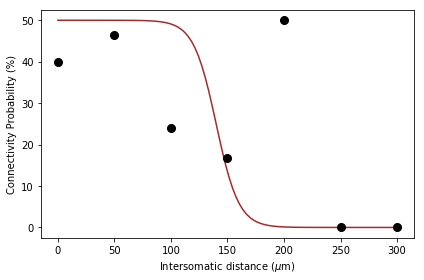

In [38]:
# plot a suggestion for fitting connection probablity data IE
xdata_IIC, ydata_IIC = [0,50,100,150,200,250,300], IIc_pr_p
x_IIC = np.linspace(0, 300, 100)
y_IIC = sigmoid3(x, A =50, C = 140, r =10)
plt.plot(x_IIC,y_IIC, color='brown');

plt.plot(xdata_IIC, ydata_IIC, 'ko', markersize=8);
#plt.ylim(-5,40), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity Probability (%)');

In [39]:
# perform best fit
# fit to the function
pinit_IIC = [40, 50, 10]
popt3, pcov3 = curve_fit(sigmoid3, xdata_IIC, ydata_IIC, p0 = pinit_IIC)
 
print(popt3)

[  35.41904762  233.20290079    0.92108218]


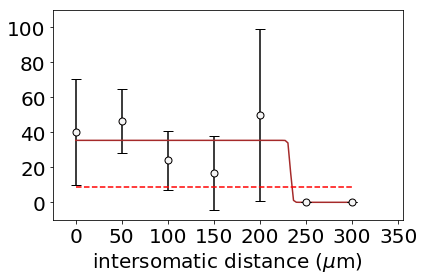

In [40]:
# Plot fitting results together with data
xfit_IIC = np.linspace(0, 300, 100)
yfit_IIC = sigmoid3(x, A = popt3[0], C = popt3[1], r=popt3[2])

plt.plot(xdata_IIC, ydata_IIC, 'ko', xfit_IIC, yfit_IIC,color = 'brown')
plt.plot([0,50,100,150,200,250,300],[0.09*100]*7, '--', color = 'red')
plt.errorbar([0,50,100,150,200,250,300], IIc_pr_p, yerr = errorIIc_p, fmt='o', color = '#f5f5f5' , markersize=7, mew=1, ecolor= 'black', capsize = 5, markeredgecolor='black')
plotstyle2()

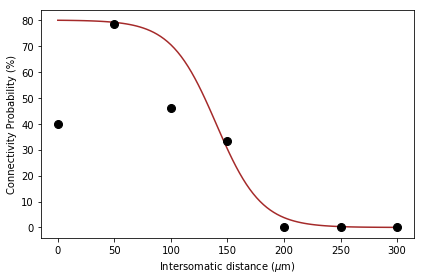

In [41]:
# plot a suggestion for fitting connection probablity data IE
xdata_IIE, ydata_IIE = [0,50,100,150,200,250,300], IIg_pr_p
x_IIE = np.linspace(0, 300, 100)
y_IIE = sigmoid2(x, A = 80, B = 0, C = 140, r =20)
plt.plot(x_IIE,y_IIE, color='brown');

plt.plot(xdata_IIE, ydata_IIE, 'ko', markersize=8);
#plt.ylim(-5,40), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity Probability (%)');

In [42]:
# perform best fit
# fit to the function
pinit_IIE = [80,140, 10]
popt4, pcov4 = curve_fit(sigmoid3, xdata_IIE, ydata_IIE, p0 = pinit_IIE)
 
print(popt4)

[  55.9772387   154.31410007   16.66691739]


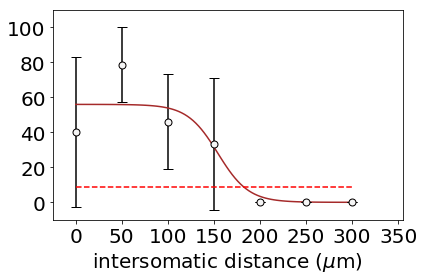

In [43]:
# Plot fitting results together with data
xfit_IIE = np.linspace(0, 300, 100)
yfit_IIE = sigmoid3(x, A = popt4[0], C = popt4[1], r=popt4[2])

plt.plot(xdata_IIE, ydata_IIE, 'ko', xfit_IIE, yfit_IIE,color = 'brown')
plt.plot([0,50,100,150,200,250,300],[0.09*100]*7, '--', color = 'red')
plt.errorbar([0,50,100,150,200,250,300], IIg_pr_p, yerr = errorIIg_p, fmt='o', color = '#f5f5f5' , markersize=7, mew=1, ecolor= 'black', capsize = 5, markeredgecolor='black')
plotstyle2()

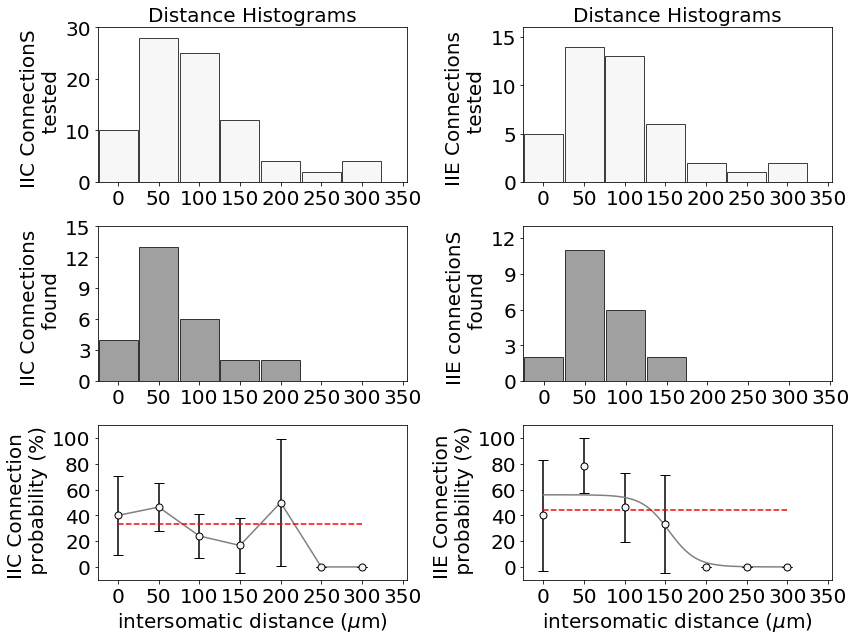

In [44]:
# 2.8. Create a figure with the 3 histograms

fig = plt.figure(figsize=(12,9))
plt.subplot(321)
plt.title('Distance Histograms', fontsize = 20)
plt.ylabel('IIC ConnectionS \n tested', fontsize = 20) 
plt.bar(bin_edges[:-1], hist_IIt, width = 48, facecolor='#f5f5f5', edgecolor='black', alpha=0.75)
plt.xlim(-25, max(bin_edges)+5)
plt.ylim(0, max(hist_IIt)+2)
plt.yticks([0, 10, 20, 30], fontsize = 20);
plt.xticks([ 0, 50, 100, 150, 200, 250, 300, 350], fontsize = 20);

plt.subplot(322)
plt.title('Distance Histograms', fontsize = 20)
plt.ylabel('IIE Connections \n tested', fontsize = 20) 
plt.bar(bin_edges[:-1], hist_IItg, width = 48, facecolor='#f5f5f5', edgecolor='black', alpha=0.75)
plt.xlim(-25, max(bin_edges)+5)
plt.ylim(0, max(hist_IItg)+2)
plt.yticks([0, 5, 10, 15], fontsize = 20);
plt.xticks([ 0, 50, 100, 150, 200, 250, 300, 350], fontsize = 20);

plt.subplot(323)
plt.ylabel('IIC Connections \n found', fontsize = 20) 
plt.bar(bin_edges1[:-1], hist1, width = 48, facecolor='grey', edgecolor='black', alpha=0.75)
plt.xlim(-25, max(bin_edges1) + 5)
#plt.ylim(ymin = 0, ymax=38)
plt.ylim(0, max(hist1)+ 2)
plt.yticks([0, 3, 6, 9, 12, 15], fontsize = 20);
plt.xticks([ 0, 50, 100, 150, 200, 250, 300, 350], fontsize = 20);

plt.subplot(324)
plt.ylabel('IIE connectionS \n found', fontsize = 20) 
plt.bar(bin_edges2[:-1], hist2, width = 48, facecolor='grey', edgecolor='black', alpha=0.75)
plt.xlim(-25, max(bin_edges2) + 2)
#plt.ylim(ymin = 0, ymax=38)
plt.ylim(0, max(hist2)+ 2)
plt.yticks([0, 3, 6, 9, 12], fontsize = 20);
plt.xticks([ 0, 50, 100, 150, 200, 250, 300, 350], fontsize = 20);

plt.subplot(325)
plt.ylabel("IIC Connection \n probability (%)", fontsize = 20)
#plt.plot(xdata_IIC, ydata_IIC, 'ko',  xfit_IIC, yfit_IIC, color = 'grey')
plt.plot([0,50,100,150,200,250,300], IIc_pr_p, '-', color = 'grey')
plt.plot([0,50,100,150,200,250,300],[0.33* 100]*7, '--', color = 'red')
plt.errorbar([0,50,100,150,200,250,300], IIc_pr_p, yerr = errorIIc_p, fmt='o', color = '#f5f5f5' , markersize=7, mew=1, ecolor= 'black', capsize = 5, markeredgecolor='black')
plotstyle2()

plt.subplot(326)
plt.ylabel("IIE Connection \n probability (%)", fontsize = 20)
#plt.plot([0,50,100,150,200,250,300], IIg_pr_p, '-', color = 'grey')
plt.plot(xdata_IIE, ydata_IIE, 'ko',  xfit_IIE, yfit_IIE, color = 'grey')
plt.plot([0,50,100,150,200,250,300],[0.44*100]*7, '--', color = 'red')
plt.errorbar([0,50,100,150,200,250,300], IIg_pr_p, yerr = errorIIg_p, fmt='o', color = '#f5f5f5' , markersize=7, mew=1, ecolor= 'black', capsize = 5, markeredgecolor='black')
plotstyle2()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
savefig('dist_probii.pdf')  

